In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
os.getcwd()

'/Users/pacobahenagaleana/Desktop/growth/masters/nlp_course/spam_classifier'

In [5]:
df = pd.read_csv("spam.tsv",sep="\t")

In [4]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [5]:
df.isna().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [6]:
df.tail()

,label,message,length,punct
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1
5571,ham,Rofl. Its true to its name,26,1


In [7]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [8]:
df.label.value_counts() / df.shape[0]

label
ham     0.865937
spam    0.134063
Name: count, dtype: float64

Very imbalanced dataset


In [9]:
df.label.value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [7]:
ham = df.loc[df["label"] == "ham"]
spam = df.loc[df["label"] == "spam"]

In [8]:
sampled_ham = ham.sample(spam.shape[0])

In [9]:
data = pd.concat([sampled_ham,spam], ignore_index=True)

In [13]:
data.label.value_counts()

label
ham     747
spam    747
Name: count, dtype: int64

In [10]:
ham_length = data.loc[data["label"] == "ham"].loc[:,["length"]]
spam_length = data.loc[data["label"] == "spam"].loc[:,"length"]

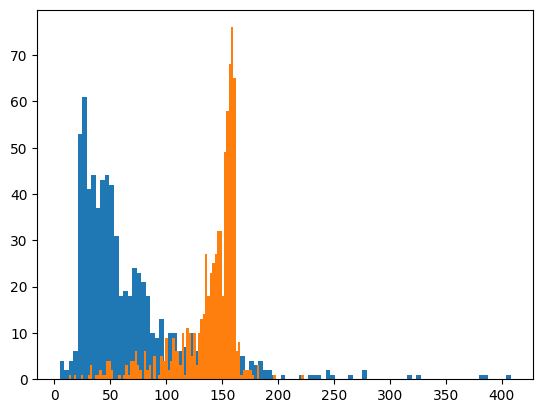

In [15]:
plt.hist(ham_length, bins=100)
plt.hist(spam_length, bins=100)
plt.show()

There is a higher probabiblity that messages that are longer are actually spam. 

In [16]:
data.dtypes

label      object
message    object
length      int64
punct       int64
dtype: object

In [17]:
ham_punct = data.loc[data["label"] == "ham"].loc[:,["punct"]]
spam_punct = data.loc[data["label"] == "spam"].loc[:,"punct"]

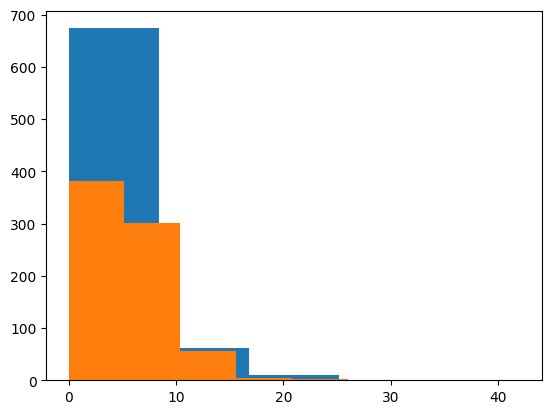

In [18]:
plt.hist(ham_punct, bins=5)
plt.hist(spam_punct, bins=5)
plt.show()

In [19]:
data.to_csv("processed_dataset.csv",index=False,header=True)

Punctuation is not a differentiator between spam messages.

## Split data

In [14]:
# !pip install scikit-learn==1.3.2

In [11]:
from sklearn.model_selection import train_test_split

In [21]:
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)>

In [22]:
import sklearn
sklearn.__version__

'1.3.2'

In [32]:
# data["message"]

In [12]:
X_train, X_test, y_train, y_test =\
train_test_split(data["message"],data["label"], test_size= 0.3, random_state= 0,shuffle=True)

In [24]:
X_train[:2]

1438      You have 1 new message. Please call 08715205273
431     Sorry, left phone upstairs. OK, might be hecti...
Name: message, dtype: object

In [13]:
type(X_train)

pandas.core.series.Series

## Apply Model

In [26]:
from pprint import pprint
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split

from sklearn.metrics \
import classification_report, recall_score, accuracy_score,precision_score,confusion_matrix

Lets take a look at the tfid vetorizer transform

In [27]:
data = pd.read_csv("processed_dataset.csv")

In [28]:
data.head()

,label,message,length,punct
0,ham,"Yup, no need. I'll jus wait 4 e rain 2 stop.",44,4
1,ham,How much would it cost to hire a hitman,39,0
2,ham,It wont b until 2.15 as trying 2 sort house ou...,60,3
3,ham,Great. Never been better. Each day gives even ...,71,2
4,ham,I had askd u a question some hours before. Its...,53,1


In [29]:
data.label.value_counts()

label
ham     747
spam    747
Name: count, dtype: int64

In [1]:
X_train, X_test, y_train, y_test =\
train_test_split(data["message"],data["label"], test_size= 0.3, random_state= 0)

NameError: name 'train_test_split' is not defined

In [31]:
## 
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
## learn vocabulary and get documents tfidf matrix, Row is document, 
## colum is the tfidf value for that document

In [32]:
X_train_tfidf.shape

(1045, 3763)

X_train_tf_idf is a sparse matrix. one columns for each word happening in any document. you see, sparse

In [49]:
X_train_tfidf

<1045x3675 sparse matrix of type '<class 'numpy.float64'>'
	with 17818 stored elements in Compressed Sparse Row format>

In [40]:
type(vectorizer.get_feature_names_out())

numpy.ndarray

In [52]:
import random
# words
words = vectorizer.get_feature_names_out()
sample_indexes = random.sample(range(words.shape[0]),10)
words[sample_indexes]

array(['her', 'finish', 'icmb3cktz8r7', 'greet', 'attempt', 'plenty',
       'savamob', 'coins', 'day', 'subs16'], dtype=object)

In [53]:
words.shape

(3763,)

In [54]:
## doc names
X_train.index

Index([1438,  431,  194,  240, 1309,  742, 1430, 1064,  981,   49,
       ...
       1094,  599,  277, 1033, 1383,  763,  835, 1216,  559,  684],
      dtype='int64', length=1045)

In [59]:
X_train_tfidf

<1045x3763 sparse matrix of type '<class 'numpy.float64'>'
	with 17873 stored elements in Compressed Sparse Row format>

In [62]:
df = pd.DataFrame(X_train_tfidf.toarray(),index=X_train.index, columns=words)
df.head()

,00,000,008704050406,0089,0121,01223585236,01223585334,02,0207,02073162414,...,yun,yup,zealand,zed,zeros,zindgi,zouk,zyada,ú1,〨ud
1438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
431,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
194,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
240,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1309,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
df.loc["doc_frequency"] = (df > 0).sum() # sums per row
df.loc["doc_frequency"].sort_values(ascending=False)

to                    470.0
you                   322.0
call                  270.0
the                   218.0
your                  199.0
                      ...  
model                   1.0
mode                    1.0
mobypobox734ls27yf      1.0
cps                     1.0
〨ud                     1.0
Name: doc_frequency, Length: 3763, dtype: float64

fit the model on the tfidf matrix from x_train and y train

In [64]:
y_train

1438    spam
431      ham
194      ham
240      ham
1309    spam
        ... 
763     spam
835     spam
1216    spam
559      ham
684      ham
Name: label, Length: 1045, dtype: object

In [65]:

mod = RandomForestClassifier(n_estimators=100).fit(X_train_tfidf,y_train)

Lets check the model on the train data. 

In [66]:
y_pred = mod.predict(X_train_tfidf)

accuracy_score(y_train,y_pred)

1.0

uuuuuuuu, so 100 precision on already seen data. 

In [67]:
X_test_tfidf = vectorizer.transform(X_test)
y_pred = mod.predict(X_test_tfidf)

In [68]:
accuracy_score(y_test,y_pred)

0.9532293986636972

Thats more like it.

Note that for evaluating data on the vectorizer preprocessing we no longer call fit_transform, but rather transform, the preprocessor has already been fit for the training data, for test data we only want to transform. 

Also note, we can also use a pipeline object to concatenate classifier fitting and transformations and preprocessing. 

### Creating the actual pipeline 

In [107]:
classifierRF = Pipeline(
    [
        ("tfidf",TfidfVectorizer()),
        # better with gini than entropy
        ("classifier",RandomForestClassifier(n_estimators=100,random_state=0,criterion="gini"))
    ]
)



In [101]:
classifierRF.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier',
                 RandomForestClassifier(criterion='entropy', random_state=0))])

In [102]:
y_pred = classifierRF.predict(X_test)

In [103]:
accuracy_score(y_test,y_pred)

0.9487750556792873

In [104]:
precision_score(y_test,y_pred, pos_label="spam")

0.9901477832512315

In [105]:
recall_score(y_test,y_pred, pos_label="spam")

0.9054054054054054

In [106]:
report = classification_report(y_test, y_pred, output_dict=True)
report["spam"]

{'precision': 0.9901477832512315,
 'recall': 0.9054054054054054,
 'f1-score': 0.9458823529411764,
 'support': 222.0}

## Support vector machine 

In [108]:
data.label.value_counts()

label
ham     747
spam    747
Name: count, dtype: int64

In [109]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)

In [110]:
mod = svm.SVC(random_state=0).fit(X_train_tfidf,y_train)

In [111]:
y_pred = mod.predict(X_test_tfidf)

In [112]:
len(y_pred)

449

LEts be tidy and use a Pipeline Object

In [113]:
classifierSVC = Pipeline(
    [
        ("tfidf",TfidfVectorizer()),
        ("svc",svm.SVC(random_state=0))
    ]
)


(1045,)

In [114]:
svc_mod = classifierSVC.fit(X_train,y_train)

In [115]:
y_pred = svc_mod.predict(X_test)

In [117]:
report = classification_report(y_test, y_pred, output_dict=True)
pprint(report["spam"])
pprint(report["ham"])
report

{'f1-score': 0.9678899082568808,
 'precision': 0.985981308411215,
 'recall': 0.9504504504504504,
 'support': 222.0}
{'f1-score': 0.9696969696969696,
 'precision': 0.9531914893617022,
 'recall': 0.986784140969163,
 'support': 227.0}


{'ham': {'precision': 0.9531914893617022,
  'recall': 0.986784140969163,
  'f1-score': 0.9696969696969696,
  'support': 227.0},
 'spam': {'precision': 0.985981308411215,
  'recall': 0.9504504504504504,
  'f1-score': 0.9678899082568808,
  'support': 222.0},
 'accuracy': 0.9688195991091314,
 'macro avg': {'precision': 0.9695863988864586,
  'recall': 0.9686172957098067,
  'f1-score': 0.9687934389769253,
  'support': 449.0},
 'weighted avg': {'precision': 0.9694038275109045,
  'recall': 0.9688195991091314,
  'f1-score': 0.9688035005662353,
  'support': 449.0}}

### Let us be tidy 

In [120]:
classifierRF = Pipeline(
    [
        ("tfidf",TfidfVectorizer()),
        ("classifier",RandomForestClassifier(n_estimators=100,random_state=0))
    ]
)

classifierSVC = Pipeline(
    [
        ("tfidf",TfidfVectorizer()),
        ("svc",svm.SVC(random_state=0))
    ]
)

rf_mod = classifierRF.fit(X_train,y_train)
y_pred_rf = rf_mod.predict(X_test)
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)

svc_mod = classifierSVC.fit(X_train,y_train)
y_pred_svc = svc_mod.predict(X_test)
report_svc = classification_report(y_test, y_pred_svc, output_dict=True)

In [121]:
report_rf

{'ham': {'precision': 0.9116465863453815,
  'recall': 1.0,
  'f1-score': 0.9537815126050421,
  'support': 227.0},
 'spam': {'precision': 1.0,
  'recall': 0.9009009009009009,
  'f1-score': 0.947867298578199,
  'support': 222.0},
 'accuracy': 0.9510022271714922,
 'macro avg': {'precision': 0.9558232931726908,
  'recall': 0.9504504504504505,
  'f1-score': 0.9508244055916205,
  'support': 449.0},
 'weighted avg': {'precision': 0.9553313476623643,
  'recall': 0.9510022271714922,
  'f1-score': 0.950857335513819,
  'support': 449.0}}

In [122]:
report_svc

{'ham': {'precision': 0.9531914893617022,
  'recall': 0.986784140969163,
  'f1-score': 0.9696969696969696,
  'support': 227.0},
 'spam': {'precision': 0.985981308411215,
  'recall': 0.9504504504504504,
  'f1-score': 0.9678899082568808,
  'support': 222.0},
 'accuracy': 0.9688195991091314,
 'macro avg': {'precision': 0.9695863988864586,
  'recall': 0.9686172957098067,
  'f1-score': 0.9687934389769253,
  'support': 449.0},
 'weighted avg': {'precision': 0.9694038275109045,
  'recall': 0.9688195991091314,
  'f1-score': 0.9688035005662353,
  'support': 449.0}}

el svc no estan preciso como el rf, pero si es mas sensible, tiene menos falsos negativos. se prefiere el rf